In [2]:
# Main Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import math
import os

# import operator for dictionary sorting operations
import operator

# preprocessing imports
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

# train-test split
from sklearn.model_selection import train_test_split

# linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# cross val, scored, scaler
from sklearn.model_selection import GridSearchCV,  cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import RobustScaler

# boxcox normalisation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# stacking
from sklearn.base import BaseEstimator, RegressorMixin, clone
import time

In [3]:
sales_train = pd.read_csv('D:\\Acadgild docs\\Class room\\Machine Learning\\Session - 13-07-2019 -Big Mart Sales III - Regression\\Train_UWu5bXk.txt', sep=',')
sales_test = pd.read_csv('D:\\Acadgild docs\\Class room\\Machine Learning\\Session - 13-07-2019 -Big Mart Sales III - Regression\\Test_u94Q5KV.txt', sep=',')
# create train and test datasets
#train = train_original.copy()
#test = test_original.copy()

In [4]:
sales_train.shape    # (8523, 12)
#loan_test.shape    # (5681, 11)

(8523, 12)

In [5]:
sales_train.info()  # dtypes: float64(4), int64(1), object(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
categories = sales_train.select_dtypes(include=['object']).columns
numericals = sales_train.select_dtypes(include=['float64', 'int64']).columns
print('Num of Categories:  ' + str(len(categories)) + '\n' + 'Num of Values:  ', str(len(numericals)))
print('categories :', categories)
print('numericals :', numericals)

Num of Categories:  7
Num of Values:   5


In [7]:
sales_test.shape    # (5681, 11)

(5681, 11)

In [85]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [5]:
sales_train.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,NaN,16.2,19.2
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods
Item_MRP,249.809,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.762,96.9726,187.821
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007
Outlet_Size,Medium,Medium,Medium,NaN,High,Medium,High,Medium,NaN,NaN
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2


In [6]:
sales_test.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Item_Identifier,FDW58,FDW14,NCN55,FDQ58,FDY38,FDH56,FDL48,FDC48,FDN33,FDA36
Item_Weight,20.75,8.3,14.6,7.315,NaN,9.8,19.35,NaN,6.305,5.985
Item_Fat_Content,Low Fat,reg,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.00756484,0.0384277,0.0995749,0.0153884,0.118599,0.0638172,0.0826015,0.0157825,0.123365,0.00569843
Item_Type,Snack Foods,Dairy,Others,Snack Foods,Dairy,Fruits and Vegetables,Baking Goods,Baking Goods,Snack Foods,Baking Goods
Item_MRP,107.862,87.3198,241.754,155.034,234.23,117.149,50.1034,81.0592,95.7436,186.892
Outlet_Identifier,OUT049,OUT017,OUT010,OUT017,OUT027,OUT046,OUT018,OUT027,OUT045,OUT017
Outlet_Establishment_Year,1999,2007,1998,2007,1985,1997,2009,1985,2002,2007
Outlet_Size,Medium,NaN,NaN,NaN,Medium,Small,Medium,Medium,NaN,NaN
Outlet_Location_Type,Tier 1,Tier 2,Tier 3,Tier 2,Tier 3,Tier 1,Tier 3,Tier 3,Tier 2,Tier 2


# Data analysis :

In [14]:
sales_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
sales_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
sales_train.describe(include = 'O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [90]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [91]:
sales_test.describe(include = 'O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,FDW10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [7]:
# Function provides details of missing columns
def missing_data_report(dataset, train_or_test = "Train"):
    missing_data = dataset.isnull().sum().sort_values(ascending=False)
    missing_data_percent = ((dataset.isnull().sum() / dataset.isnull().count()) * 100).sort_values(ascending=False)
    
    missing_report = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percentage'])
    missing_report.rename_axis(train_or_test, inplace=True)
    
    return missing_report[missing_report > 0]

# Function to customise table display
def multi_table(table_list):
    from IPython.core.display import HTML
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [8]:
# Dataframe of missing data
train_missing, test_missing = missing_data_report(sales_train, "Train"), missing_data_report(sales_test, "Test")

# Top Ten Missing data report
multi_table([train_missing.head(), test_missing.head()])

,Total,Percentage
Train,,
Outlet_Size,2410.0,28.276428
Item_Weight,1463.0,17.165317
Item_Outlet_Sales,NaN,NaN
Outlet_Type,NaN,NaN
Outlet_Location_Type,NaN,NaN
,Total,Percentage
Test,,
Outlet_Size,1606.0,28.269671
Item_Weight,976.0,17.180074


In [9]:
# Check for NAs

def checknulls(df):
    nullcols = df.isnull().sum().sort_values(ascending=False)
    return nullcols[nullcols>0]

checknulls(sales_train)

Outlet_Size    2410
Item_Weight    1463
dtype: int64

Correlation matrix
This is done to have a clear picture on the correlation between columns in the dataset.**

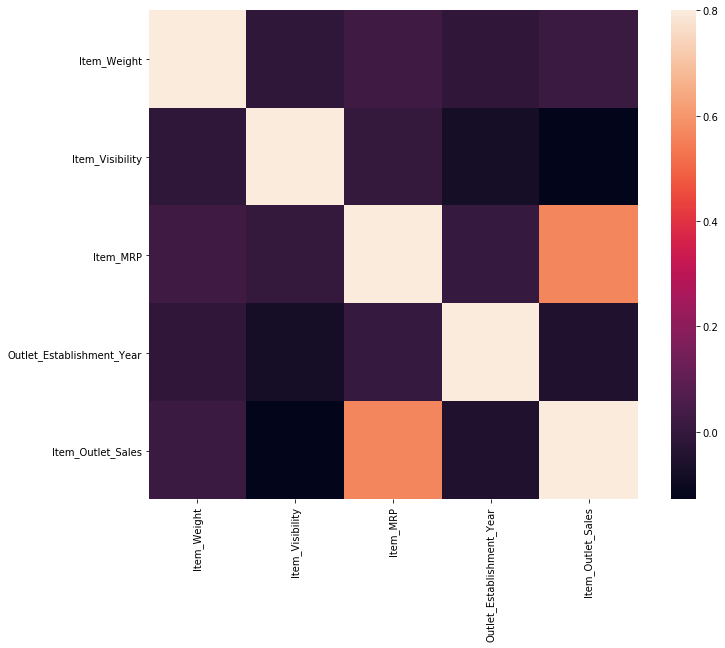

In [15]:
corrmat = sales_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True)

Distribution of significant numerical variables

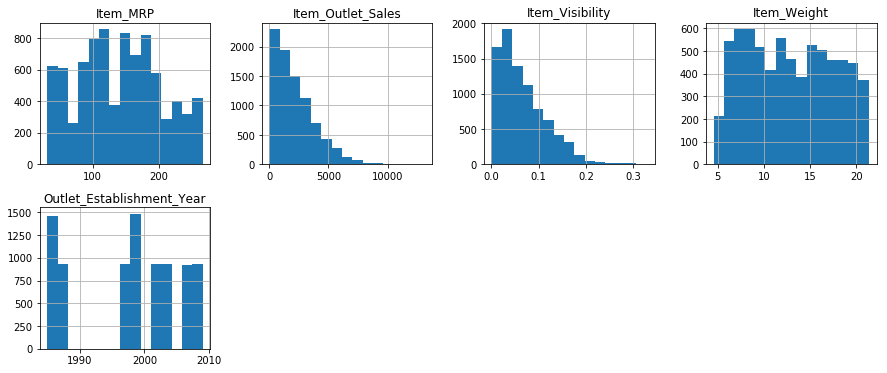

In [34]:
# Item_Weight has NANs
sig_numerical = ["Item_Outlet_Sales", "Item_MRP", "Item_Visibility", "Outlet_Establishment_Year", "Item_Weight"]
dis = sales_train[sig_numerical].hist(bins=15, figsize=(15,6), layout=(2,4))

Visualising of significant categorical variables

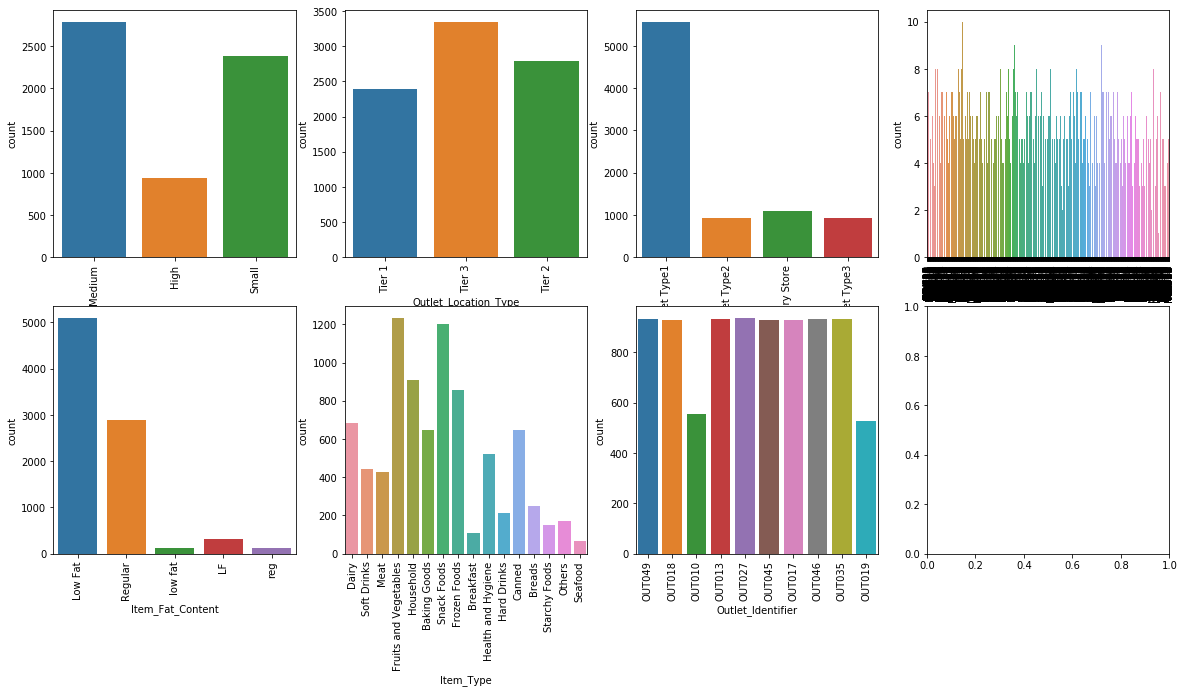

In [37]:
sig_categorical = ["Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier"]
fig, ax = plt.subplots(2,4, figsize=(20,10))

# Loop over every categorical variable to create countplot
for var, subplot in zip(sig_categorical, ax.flatten()):
    sns.countplot(sales_train[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [16]:
sales_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
sales_train.Item_Fat_Content.value_counts()  # Whether the product is low fat or not

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
sales_train.Item_Type.value_counts() 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
sales_train.Outlet_Identifier.value_counts() 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Finding the best variables

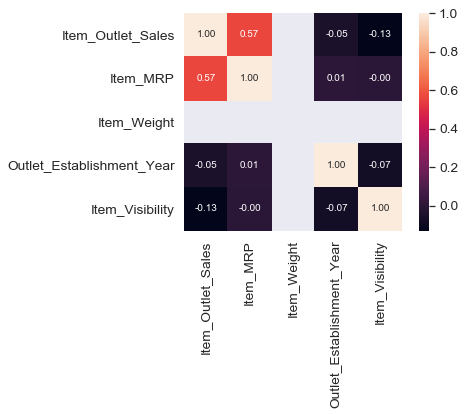

In [20]:
k = 10 #number of variables for heatmap
cormat=sales_train.corr()
cols = cormat.nlargest(k, 'Item_Outlet_Sales')['Item_Outlet_Sales'].index
cm = np.corrcoef(sales_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Visual Representation of highly correlated features  from mentioned above full Correlation matrix

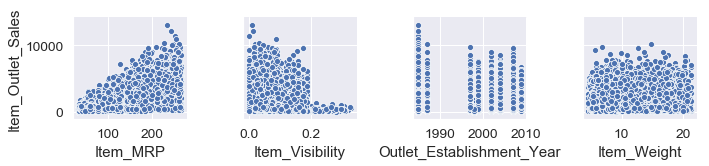

In [47]:
chartB = sns.pairplot(data=sales_train,x_vars=['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_Weight'],y_vars=['Item_Outlet_Sales'])
# NOTE : Correlation decending order, Item_Outlet_Sales has high Correlation with Item_MRP and Item_Outlet_Sales has low Correlation with Item_Weight

Looking at the distribution of "Item_Outlet_Sales" (Dependant Variable)

In [99]:
sales_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Item_Outlet_Sales is quite varied from the maximum and the minimum.

C:\Users\Sanjana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Kurt: 1.6142249915903424
Skew: 1.1773233539676373


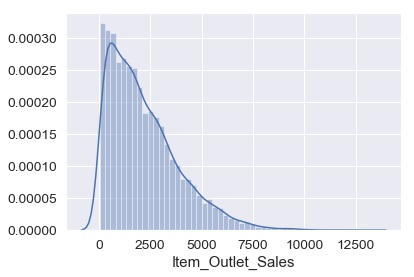

In [49]:
sns.distplot(sales_train['Item_Outlet_Sales'])
print('Kurt: ' + str(kurtosis(sales_train['Item_Outlet_Sales'])) + '\n' + 'Skew: ' +str(skew(sales_train['Item_Outlet_Sales'])))

Item_Outlet_Sales is definitely skewed and not normal. We will log it when splitting into the test set

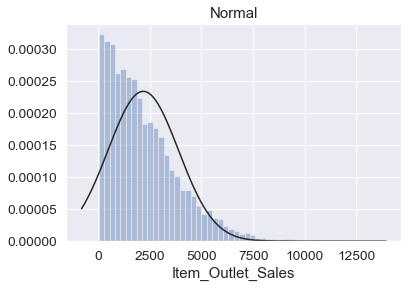

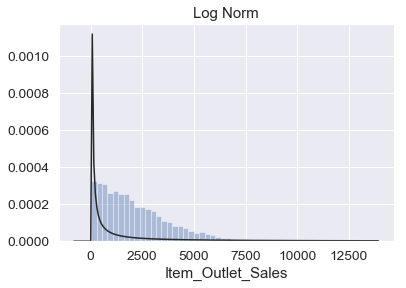

In [50]:
plt.figure(1); plt.title('Normal')
sns.distplot(sales_train['Item_Outlet_Sales'], kde=False, fit=stats.norm)

plt.figure(2); plt.title('Log Norm')
sns.distplot(sales_train['Item_Outlet_Sales'], kde=False, fit=stats.lognorm)

Logging it will definitely fit the data better

# Cleaning Data

In [10]:
sales_train_CD = sales_train.copy()   # copy training dataset
sales_test_CD = sales_test.copy()   # copy test dataset

Transformations :

Fix a few incorrect values; these values either had typos or had 'garage built' after house was sold.

Impute 0 values for variables where nulls likely mean absence of the attribute.

Calculate several aggregate variables on square footage and baths.

Change 'YearBuilt' to an 'AgeSold' variable which is slightly more accurate.

Add a 'TotalArea' feature that includes the garage.

Change a few values for the year of remodeling as they were listed as remodeled after house sold.

In [11]:
# fix a few incorrect values; Ex :these values either had typos or had 'garage built' after house was sold
# fix a few incorrect(Junk) values ex : Item_Fat_Content has Low Fat, LF, low fat are same and Regular, reg are same  
#Low Fat    5089
#Regular    2889
#LF          316
#reg         117
#low fat     112

def df_transform(df):
# assign labels for Item_Fat_Content
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Low Fat', 1)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 1)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 1)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Regular', 0)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 0)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(int)
    
    return df

In [12]:
sales_train_CD = df_transform(sales_train_CD)
sales_train_CD['Item_Fat_Content'].value_counts()
#sales_train.Item_Fat_Content.value_counts()  # Whether the product is low fat or not

1    5517
0    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
# drop nulls
# Handling Nulls  : Outlet_Size(catagorical) has 2410 NANs
sales_train_CD.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
#Item_Weight(Numerical) has 1463 NANs
sales_train_CD.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
16.700    66
10.500    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
15.000    59
18.850    59
15.850    59
16.750    58
18.250    58
19.600    58
15.700    57
12.500    56
9.195     56
20.200    53
12.100    53
10.195    53
12.600    53
15.600    52
13.500    51
11.500    51
          ..
5.305      3
6.305      3
7.710      3
7.105      3
5.825      3
6.460      3
5.425      3
6.895      2
8.920      2
6.325      2
6.400      2
4.905      2
5.675      2
5.155      2
7.275      2
5.210      2
8.485      2
8.800      2
5.885      2
7.605      2
6.405      2
5.735      2
8.670      2
6.775      2
7.890      2
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

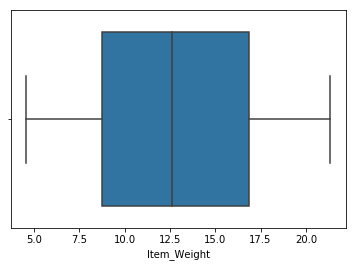

In [145]:
sns.boxplot('Item_Weight',data=sales_train_CD)     # X axis

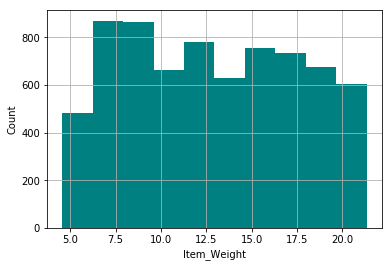

The Mean age of passengers is : 12
The Median age of passengers is : 12
The Standard Deviation age of passengers is : 4


In [15]:
sales_train_CD.Item_Weight.hist(bins=10,color='teal')
plt.xlabel('Item_Weight')
plt.ylabel('Count')
plt.show()
print("The Mean age of passengers is :", int(sales_train_CD.Item_Weight.mean()))
print("The Median age of passengers is :", int(sales_train_CD.Item_Weight.median()))
print("The Standard Deviation age of passengers is :", int(sales_train_CD.Item_Weight.std()))

NOTE : Since Mean and Median are same. It is normal distributed. we can fill NANs with median or mean.

In [58]:
#def mean_Weight_map(feature):
#  
#    le = LabelEncoder()    
#    feature = le.fit_transform(feature)  
#    mean_Weight = sales_train.groupby(feature, as_index=True)['Item_Outlet_Sales'].mean()
#    mean_Weight_length = len(mean_Weight)
#    numbers = np.linspace(0, mean_Weight_length, (mean_Weight_length+1))
#    mean_Weight_dict = dict(zip(numbers, mean_Weight))
#    return mean_Weight_dict
    
#def median_Weight_map(feature):
#
#    le = LabelEncoder()    
#    feature = le.fit_transform(feature)  
#    med_Weight = sales_train.groupby(feature, as_index=True)['Item_Outlet_Sales'].median()
#    med_Weight_length = len(med_Weight)
#    numbers = np.linspace(0, med_Weight_length, (med_Weight_length+1))
#    med_Weight_dict = dict(zip(numbers, med_Weight))
#    return med_Weight_dict

In [16]:
Weight_median = sales_train_CD.Item_Weight.median()       # 12.6
#filling the missing Item_Weight values in train and test datasets
sales_train_CD.Item_Weight.fillna(Weight_median,inplace=True)    # median value for Item_Weight is 12.6
#sales_train_CD["Item_Weight"] = sales_train_CD['Item_Weight'].transform(lambda x: x.fillna(x.median()))
checknulls(sales_train_CD)

Outlet_Size    2410
dtype: int64

In [26]:
#Note : use function for filling Mode value for Outlet_Size feature
# Create a list of columns that have missing values and an index (True / False)
df_missing = sales_train_CD.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
idx_ = df_missing['missing_count'] > 0
df_missing = df_missing.ix[idx_]
cols_missing = df_missing.column_name.values
idx_cols_missing = sales_train_CD.columns.isin(cols_missing)
idx_cols_missing

C:\Users\Sanjana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array([False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [27]:
#idx_cols_missing[1]     # sales_train.['Item_Weight']
idx_cols_missing[8]     # sales_train.['Outlet_Size']

True

In [73]:
#from sklearn import preprocessing
## Instantiate an imputer
#imputer = preprocessing.Imputer(missing_values='NaN', strategy = 'most_frequent', axis = 0)

## Fit the imputer using all of our data (but not any dates)
#imputer.fit(sales_train.ix[:, idx_cols_missing[8]])

## Apply the imputer
#sales_train.ix[:, idx_cols_missing[8]] = imputer.transform(sales_train.ix[:, idx_cols_missing[8]])

## See the results - note how all missing are replaced with the mode
#sales_train.head()

In [34]:
#sizemode = sales_train['Outlet_Size'].mode()
#sizemode[0]
#sales_train['Outlet_Size'].mode()[0]
#sales_train_CD.Outlet_Size.fillna(sales_train_CD['Outlet_Size'].mode()[0],inplace=True)    # most frequent value for Outlet_Size is Medium

size_mode = sales_train_CD.Outlet_Size.mode()    # Medium
#filling the missing Outlet_Size values in train and test datasets
sales_train_CD.Outlet_Size.fillna('Medium',inplace=True)    # median frequent value for Outlet_Size is Medium

In [35]:
checknulls(sales_train_CD)

Series([], dtype: int64)

In [36]:
sales_train_CD.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [37]:
sales_train_CD.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2
Item_Fat_Content,1,0,1,0,1,0,0,1,0,0
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods
Item_MRP,249.809,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.762,96.9726,187.821
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2


In [33]:
sales_test_CD = df_transform(sales_test_CD)
sales_test_CD['Item_Fat_Content'].value_counts()
#sales_train.Item_Fat_Content.value_counts()  # Whether the product is low fat or not

1    3668
0    2013
Name: Item_Fat_Content, dtype: int64

In [34]:
###### Handling NANs in Test dataset
checknulls(sales_test_CD)

Outlet_Size    1606
Item_Weight     976
dtype: int64

In [38]:
sales_test_CD.Item_Weight.fillna(Weight_median,inplace=True)    # median value for Item_Weight is 12.6
sales_test_CD.Outlet_Size.fillna('Medium',inplace=True)    # median frequent value for Outlet_Size is Medium
#sales_test_CD["Item_Weight"] = sales_train_CD['Item_Weight'].transform(lambda x: x.fillna(x.median()))
#sales_test_CD.Outlet_Size.fillna(sales_train_CD['Outlet_Size'].mode()[0],inplace=True)    # most frequent value for Outlet_Size is Medium
checknulls(sales_test_CD)

Series([], dtype: int64)

In [39]:
sales_test_CD.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Feature engineering

Favouring ordinal:

Ordinal Is favoured in this case as it creates ranking for the model to recognise. Some of the categories are simply "present" or "not present" but require a scale.

Grouping variabes:

Grouping qualities and surface area were done as there was significant correlations between the the different all the qualities and surface areas

In [40]:
sales_train_FE = sales_train_CD.copy()   # copy training dataset
sales_test_FE = sales_test_CD.copy()   # copy test dataset

In [41]:
sales_train_FE["TrainOrTest"] = "train"
sales_test_FE["TrainOrTest"] = "test"
sales_all = pd.concat([sales_train_FE, sales_test_FE], sort=False) # use sort=False to maintain Features order unchange
# Note : after combined datasets, NAN populated in Loan_Status for test dataset
sales_all.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2
Item_Fat_Content,1,0,1,0,1,0,0,1,0,0
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods
Item_MRP,249.809,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.762,96.9726,187.821
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2


In [42]:
sales_all.shape

(14204, 13)

In [43]:
sales_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
TrainOrTest                  14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [44]:
def feature_transformations(df):
# Outlet_Establishment_Year built nulls and transformation
#    df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].replace(np.nan, 1900)
    This_Year = 2019
    df['OutletAge'] = This_Year - df['Outlet_Establishment_Year']
    df = df.drop(['Outlet_Establishment_Year'], axis=1)
    
    return df

In [45]:
# feature transformations
#Change 'Outlet_Establishment_Year' to an 'AgeEstablishment' variable which is slightly more accurate
sales_all = feature_transformations(sales_all)

In [46]:
#  Item_MRP / Item_Weight = MRPWeightRatio , if it is very low, chances of sales high.  need to check.
sales_all.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,TrainOrTest,OutletAge
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,20
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,10
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,20
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,train,21
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,32


In [47]:
sales_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier         14204 non-null object
Item_Weight             14204 non-null float64
Item_Fat_Content        14204 non-null object
Item_Visibility         14204 non-null float64
Item_Type               14204 non-null object
Item_MRP                14204 non-null float64
Outlet_Identifier       14204 non-null object
Outlet_Size             14204 non-null object
Outlet_Location_Type    14204 non-null object
Outlet_Type             14204 non-null object
Item_Outlet_Sales       8523 non-null float64
TrainOrTest             14204 non-null object
OutletAge               14204 non-null int64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [48]:
# dtype : object to Int64   # 1559 unique types
sales_all['Item_Identifier'] =  list(pd.factorize(sales_all['Item_Identifier'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [58]:
# dtype : object to Int64   # 1559 unique types
sales_all['Item_Fat_Content'] =  list(pd.factorize(sales_all['Item_Fat_Content'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [49]:
# dtype : object to Int64   # 16 unique types
sales_all['Item_Type'] =  list(pd.factorize(sales_all['Item_Type'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [50]:
# dtype : object to Int64   # 10 unique types
sales_all['Outlet_Identifier'] =  list(pd.factorize(sales_all['Outlet_Identifier'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [51]:
# dtype : object to Int64     # 3 unique types
sales_all['Outlet_Size'] =  list(pd.factorize(sales_all['Outlet_Size'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [54]:
# dtype : object to Int64      # 3 unique types
sales_all['Outlet_Location_Type'] =  list(pd.factorize(sales_all['Outlet_Location_Type'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [55]:
# dtype : object to Int64     # # 4 unique types
sales_all['Outlet_Type'] =  list(pd.factorize(sales_all['Outlet_Type'])[0])   # Male as 0 and Female as 1 ==> Is_Female

In [59]:
sales_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier         14204 non-null int64
Item_Weight             14204 non-null float64
Item_Fat_Content        14204 non-null int64
Item_Visibility         14204 non-null float64
Item_Type               14204 non-null int64
Item_MRP                14204 non-null float64
Outlet_Identifier       14204 non-null int64
Outlet_Size             14204 non-null int64
Outlet_Location_Type    14204 non-null int64
Outlet_Type             14204 non-null int64
Item_Outlet_Sales       8523 non-null float64
TrainOrTest             14204 non-null object
OutletAge               14204 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.5+ MB


In [60]:
sales_all.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Item_Identifier,0,1,2,3,4,5,6,7,8,9
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2
Item_Fat_Content,0,1,0,1,0,1,1,0,1,1
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496
Item_Type,0,1,2,3,4,5,6,6,7,7
Item_MRP,249.809,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.762,96.9726,187.821
Outlet_Identifier,0,1,0,2,3,1,3,4,5,6
Outlet_Size,0,0,0,0,1,0,1,0,0,0
Outlet_Location_Type,0,1,0,1,1,1,1,1,2,2
Outlet_Type,0,1,0,2,0,1,0,3,0,0


In [61]:
sales_all = sales_all.drop(['TrainOrTest'], axis=1)   # do we need to drop Item_Identifier ?

In [62]:
sales_all.head(10).transpose()  # when we use transpose(), all values are po;ulated as float64

,0,1,2,3,4,5,6,7,8,9
Item_Identifier,0.000000,1.000000,2.00000,3.000,4.0000,5.0000,6.000000,7.00000,8.000000,9.00000
Item_Weight,9.300000,5.920000,17.50000,19.200,8.9300,10.3950,13.650000,12.60000,16.200000,19.20000
Item_Fat_Content,0.000000,1.000000,0.00000,1.000,0.0000,1.0000,1.000000,0.00000,1.000000,1.00000
Item_Visibility,0.016047,0.019278,0.01676,0.000,0.0000,0.0000,0.012741,0.12747,0.016687,0.09445
Item_Type,0.000000,1.000000,2.00000,3.000,4.0000,5.0000,6.000000,6.00000,7.000000,7.00000
Item_MRP,249.809200,48.269200,141.61800,182.095,53.8614,51.4008,57.658800,107.76220,96.972600,187.82140
Outlet_Identifier,0.000000,1.000000,0.00000,2.000,3.0000,1.0000,3.000000,4.00000,5.000000,6.00000
Outlet_Size,0.000000,0.000000,0.00000,0.000,1.0000,0.0000,1.000000,0.00000,0.000000,0.00000
Outlet_Location_Type,0.000000,1.000000,0.00000,1.000,1.0000,1.0000,1.000000,1.00000,2.000000,2.00000
Outlet_Type,0.000000,1.000000,0.00000,2.000,0.0000,1.0000,0.000000,3.00000,0.000000,0.00000


# Normalisation

In [58]:
#Skewed Features
#We created a list of numerics to transform
#Use BoxCox Transformation / Scaling

BoxCox Transformation:

A boxcox transformation standardised our data; standardising the data reduced the range and effectively the variablity.

Standardization (also called z-score normalization) transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

In [63]:
n_train = sales_train_FE.shape[0]
df = sales_all[:n_train]

In [64]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in sales_all:
    if sales_all[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = sales_all[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews = skews.drop(['Item_Outlet_Sales'], axis=0)

In [65]:
skew_features

Item_Visibility         1.195049
Outlet_Type             1.188223
Item_Fat_Content        0.927626
Outlet_Size             0.694870
Item_Type               0.464094
OutletAge               0.396423
Item_Weight             0.134697
Item_MRP                0.130715
Item_Identifier         0.006406
Outlet_Identifier      -0.055972
Outlet_Location_Type   -0.080789
Item_Outlet_Sales            NaN
dtype: float64

We need to handle the feature that has skewnees is greater than 0.75

In [66]:
high_skew = skew_features[skew_features > 0.75]
skew_index = high_skew.index
   
for i in high_skew.index:
    sales_all[i]= boxcox1p(sales_all[i], boxcox_normmax(sales_all[i]+1))
        
skew_features2 = sales_all[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
print(skews2.to_string())

                          skew
Outlet_Type           0.986255
Outlet_Size           0.694870
Item_Type             0.464094
OutletAge             0.396423
Item_Fat_Content      0.396047
Item_Weight           0.134697
Item_MRP              0.130715
Item_Visibility       0.111298
Item_Identifier       0.006406
Outlet_Identifier    -0.055972
Outlet_Location_Type -0.080789
Item_Outlet_Sales          NaN


Scaling:

Implementing the the RobustScaler help to scale the data, similarly as the boxcox transformation.

In scaling (also called min-max scaling), you transform the data such that the features are within a specific range e.g. [0, 1].

Definitions sourced from: https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization

In [67]:
train = sales_all[:n_train]
test = sales_all[n_train:]

scaler = RobustScaler()

X_train = train.drop(['Item_Outlet_Sales'], axis=1)
X_test = test.drop(['Item_Outlet_Sales'], axis=1)
y_train = train['Item_Outlet_Sales']

X_train_scaled = scaler.fit(X_train).transform(X_train)
y_train_logged = np.log(train['Item_Outlet_Sales'])
X_test_scaled= scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
y_logged_df = pd.DataFrame(y_train_logged)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [68]:
X_train.shape   # (8523, 11)
# X_test.shape   # (5681, 11)
#y_train.shape    # (8523,)

(8523, 11)

In [69]:
X_train.head()  
# X_test.shape   # (5681, 11)
#y_train.shape    # (8523,)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,OutletAge
0,0,9.30,0.000000,0.014847,0,249.8092,0,0,0,0.000000,20
1,1,5.92,0.769506,0.017565,1,48.2692,1,0,1,0.768584,10
2,2,17.50,0.000000,0.015454,2,141.6180,0,0,0,0.000000,20
3,3,19.20,0.769506,0.000000,3,182.0950,2,0,1,1.296125,21
4,4,8.93,0.000000,0.000000,4,53.8614,3,1,1,0.000000,32


# Feature Importance

In [70]:
#L1 penalties (lasso) will exclude variables that are not too well correlated.
lasso_fi=Lasso(alpha=0.001)
lasso_fi.fit(X_train_scaled,y_train_logged)
FI_lasso = pd.DataFrame({"Feature Importance":lasso_fi.coef_}, index=X_train.columns)
FI_sorted = FI_lasso.sort_values("Feature Importance",ascending=False)
print(FI_sorted.to_string())

                      Feature Importance
Item_MRP                        0.763512
Outlet_Location_Type            0.402982
OutletAge                       0.350867
Item_Fat_Content                0.028579
Item_Type                       0.014013
Item_Identifier                 0.006326
Item_Weight                    -0.008073
Outlet_Identifier              -0.093856
Item_Visibility                -0.182661
Outlet_Size                    -0.310692
Outlet_Type                    -0.362743


# Models :

Assessing Models: We utilised the Root Mean Squared Error (RMSE) to identify the performance of the train and test, ultimately, to indicate any overfitting/underfitting in the models. Cross Validation assisted us with running permutations of the different parameters to produce the most effective model with the least RMSE

Models Performed:

Linear Regression

Ridge

Lasso

Random Forest Regressor

In [89]:
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
    return np.sqrt(mean_squared_error(y_test, y_pred))


class CvScore(object):
    def __init__(self, list, name_list, X, y, folds=5, score='neg_mean_squared_error', seed=66, split=0.33):
        self.X = X
        self.y = y
        self.folds = folds
        self.score = score
        self.seed = seed
        self.split = split
        self.model = list[0]
        self.list = list
        self.name = name_list[0]
        self.name_list = name_list
    
    def cv(self):
        cv_score = cross_val_score(self.model, self.X, self.y, cv=self.folds, scoring=self.score)
        score_array = np.sqrt(-cv_score)
        mean_rmse = np.mean(score_array)
        print("Mean RMSE: ", mean_rmse)
    
    def cv_list(self):
        for name, model in zip(self.name_list, self.list):
            cv_score = cross_val_score(model, self.X, self.y, cv=self.folds, scoring=self.score)
            score_array = np.sqrt(-cv_score)
            mean_rmse = np.mean(score_array)
            std_rmse = np.std(score_array)
            print("{}: {:.5f}, {:.4f}".format(name, mean_rmse, std_rmse))

Linear Regression
Y=β0+β1X1+β2X2+...+βpXp
 
Lasso
∑i=1n(yi−(a+∑j=1pbjxij))2+α∑j=1p|bj|
 
Ridge
∑i=1n(yi−(a+∑j=1pbjxij))2+α∑j=1pb2j

Random Forest Regressor

In [96]:
lr = LinearRegression()

#Best parameters found:  {'alpha': 10} 0.804183454454523
ridge = Ridge(alpha=10)

#Best parameters found:  {'alpha': 0.0001} 0.8041924542140036
lasso = Lasso(alpha=0.0001)

# Best parameters found:  {'n_estimators': 600, 'max_depth': 200} 0.12673567602317132
rfr = RandomForestRegressor(max_depth=200, n_estimators=600)

regression_list = [lr, ridge, lasso, rfr]
name_list = ["Linear", "Ridge", "Lasso", "Random Forest"]

In [97]:
#import time
start_time = time.time()
scores = CvScore(regression_list, name_list, X_train_scaled,y_train_logged)
scores.cv_list()
stop_time = time.time()
print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

#Linear: 0.80416, 0.0073
#Ridge: 0.80421, 0.0075
#Lasso: 0.80416, 0.0073
#Random Forest: 0.55399, 0.0060

Linear: 0.80416, 0.0073
Ridge: 0.80415, 0.0074
Lasso: 0.80416, 0.0073
Random Forest: 0.55405, 0.0054
Execution time: 175.28087091445923 ms


Hyperparameter Tuning
Using a grid search cross-validation method, the models could be fine tuned with the optimal paramaters.

GridSearch looks at the best mean score for each combination of parameters in each model.

Ridge: alpha
    
Lasso: alpha
    
Random Forest Regressors : number of estimators and maximum depth

In [225]:
#class grid():
#    def __init__(self,model):
#        self.model = model
#    
#    def grid_get(self,X,y,param_grid):
#        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
#        grid_search.fit(X,y)
#        print("Best parameters found: ", grid_search.best_params_, np.sqrt(-grid_search.best_score_))
#        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
#        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [92]:
#from sklearn.model_selection import GridSearchCV
#import time
from sklearn.model_selection import RandomizedSearchCV

class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        Random_search = RandomizedSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        start_time = time.time()
        Random_search.fit(X,y)
        print("Best parameters found: ", Random_search.best_params_, np.sqrt(-Random_search.best_score_))
        Random_search.cv_results_['mean_test_score'] = np.sqrt(-Random_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(Random_search.cv_results_)[['params','mean_test_score','std_test_score']])
        stop_time = time.time()
        print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')
        #print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [93]:
param_grid={'alpha':[0.00001, 0.0001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 4, 10, 20, 25, 30, 35, 40, 60, 100, 250, 500]}
grid(Ridge()).grid_get(X_train_scaled,y_train_logged,param_grid)

Best parameters found:  {'alpha': 10} 0.804183454454523
             params  mean_test_score  std_test_score
0   {'alpha': 0.75}         0.804194        0.011745
1    {'alpha': 500}         0.812667        0.016035
2     {'alpha': 10}         0.804183        0.011830
3      {'alpha': 1}         0.804193        0.011747
4      {'alpha': 4}         0.804188        0.011775
5     {'alpha': 20}         0.804189        0.011923
6  {'alpha': 1e-05}         0.804195        0.011738
7     {'alpha': 60}         0.804361        0.012306
8    {'alpha': 0.5}         0.804194        0.011743
9     {'alpha': 25}         0.804198        0.011970
Execution time: 1.1542837619781494 ms


C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\skle

In [94]:
param_grid={'alpha':[0.00001, 0.0001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]}
grid(Lasso()).grid_get(X_train_scaled,y_train_logged,param_grid)

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best parameters found:  {'alpha': 0.0001} 0.8041924542140036
              params  mean_test_score  std_test_score
0   {'alpha': 1e-05}         0.804195        0.011740
1  {'alpha': 0.0001}         0.804192        0.011753
2    {'alpha': 0.01}         0.806974        0.014224
3     {'alpha': 0.1}         0.865888        0.028566
4    {'alpha': 0.25}         0.949680        0.034372
5     {'alpha': 0.5}         1.017169        0.035431
6    {'alpha': 0.75}         1.017169        0.035431
7       {'alpha': 1}         1.017169        0.035431
Execution time: 0.6705961227416992 ms


C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\skle

In [95]:
# Random Forest Regression
#p_grid = {'n_estimators':  [6, 8 ,10, 12, 14] }

rfr_param_grid = {
     'n_estimators':[100, 200, 400, 600, 800],
     'max_depth': [80, 120, 160, 200]
}

grid(RandomForestRegressor()).grid_get(X_train_scaled,y_train_logged,rfr_param_grid)

Best parameters found:  {'n_estimators': 600, 'max_depth': 200} 0.5536599989279424
                                    params  mean_test_score  std_test_score
0  {'n_estimators': 600, 'max_depth': 200}         0.553660        0.006279
1  {'n_estimators': 800, 'max_depth': 200}         0.553938        0.005862
2  {'n_estimators': 600, 'max_depth': 160}         0.554191        0.006137
3  {'n_estimators': 800, 'max_depth': 160}         0.553755        0.006177
4   {'n_estimators': 400, 'max_depth': 80}         0.553992        0.005913
5  {'n_estimators': 100, 'max_depth': 120}         0.556271        0.005395
6  {'n_estimators': 600, 'max_depth': 120}         0.553997        0.006455
7   {'n_estimators': 600, 'max_depth': 80}         0.553997        0.006421
8  {'n_estimators': 200, 'max_depth': 120}         0.554909        0.006305
9  {'n_estimators': 400, 'max_depth': 120}         0.554255        0.006331
Execution time: 1594.225393295288 ms


C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Sanjana\Anaconda3\lib\site-packages\skle

Ensemble

In [98]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

# class object group for ensembling the model predictions together
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [99]:
# even weighted model
variables = 4

w1 = 1/variables
w2 = 1/variables
w3 = 1/variables
w4 = 1/variables

#import time
start_time = time.time()
weight_avg = AverageWeight(mod = [lr, lasso, ridge, rfr],weight=[w1,w2,w3,w4])

score = rmse_cv(weight_avg,X_train_scaled,y_train_logged)
print(score.mean())
stop_time = time.time()
print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

0.6964558660052849
Execution time: 176.79290199279785 ms


NOTE : select the model which least RMSE value from even weighted model, Linear Reg, Lasso, Ridge, Random Forest Reg.

Linear: 0.80416, 0.0073

Ridge: 0.80415, 0.0074

Lasso: 0.80416, 0.0073

Random Forest: 0.55405, 0.0054

even weighted model : 0.69645

# Test Data

In [100]:
a = Imputer().fit_transform(X_train_scaled)
b = Imputer().fit_transform(y_train_logged.values.reshape(-1,1)).ravel()

ensemble_model = AverageWeight(mod = [lr, lasso, ridge, rfr],weight=[w1,w2,w3,w4])
ensemble_model = ensemble_model.fit(a,b)

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [109]:
prediction = np.exp(ensemble_model.predict(X_test_scaled))
print(prediction)

#sales_test_FE[['Item_Identifier', 'Outlet_Identifier']]
Item_list = sales_test_FE['Item_Identifier']
Outlet_list = sales_test_FE[ 'Outlet_Identifier']
submission =pd.DataFrame({'Item_Identifier': Item_list, 'Outlet_Identifier': Outlet_list,'SalePrice': prediction})
submission#.to_csv("submission.csv",index=False)

[1524.9177874  1377.89688721 1549.57909228 ... 1709.59726126 4545.51871464
 1293.28022755]


,Item_Identifier,Outlet_Identifier,SalePrice
0,FDW58,OUT049,1524.917787
1,FDW14,OUT017,1377.896887
2,NCN55,OUT010,1549.579092
3,FDQ58,OUT017,2339.031316
4,FDY38,OUT027,2854.216446
5,FDH56,OUT046,1031.465816
6,FDL48,OUT018,529.497360
7,FDC48,OUT027,993.428250
8,FDN33,OUT045,1326.158888
9,FDA36,OUT017,3163.817888


In [110]:
submission.to_csv("sales_submission.csv",index=False)

In [108]:
#sales_test_FE[['Item_Identifier', 'Outlet_Identifier']]
#loan_train[["Credit_History", "Loan_Status"]].groupby(['Credit_History'], as_index=False).mean().sort_values(by='Loan_Status', ascending=False)
Item_list = sales_test_FE['Item_Identifier']
Outlet_list = sales_test_FE[ 'Outlet_Identifier']
submission =pd.DataFrame({'Item_Identifier': Item_list, 'Outlet_Identifier': Outlet_list})
submission

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
5,FDH56,OUT046
6,FDL48,OUT018
7,FDC48,OUT027
8,FDN33,OUT045
9,FDA36,OUT017


In [ ]:
################### Variable importance
# Create a dataframe of the variable importances
df_ = pd.DataFrame(sales_all.columns, columns = ['feature'])
df_['fscore'] = ensemble_model.feature_importances_[:, ]

# Plot the relative importance of the top 10 features
df_['fscore'] = df_['fscore'] / df_['fscore'].max()
df_.sort_values('fscore', ascending = False, inplace = True)
df_ = df_[0:10]
df_.sort_values('fscore', ascending = True, inplace = True)
df_.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('Random forest feature importance', fontsize = 24)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks(fontsize=20)
plt.show()